# Google Top Stories - An exploration
### *@author* Jyontika Kapoor
This dataset was collected during the pandemic, it contains headlines shown by Google Search.

The dataset is organized by year, month, date, hour, in a series of nested folders. The leaf folders contain JSON files with information about top stories. 

Your goal is to write first Python function that takes the name of the folder "GoogleTopStories" and stores the content of all the JSON files into a single CSV file. Once you have a CSV file, you can practice your pandas & seaborn skills in analyzing the data.

Some tips and ideas for analysis:
1. Use the Python command `os.walk` to iteratively traverse the nested subfolders. Account for hidden files that start with .
2. Although the dataset has a column domain, imagine that it doesn't have it and write a function that takes a URL and extract the domain name from it and saves it in a colum. Use the .apply method to create the column. Learn how to parse URLs with urllib.parse.
3. Create a bar chart with the frequencies of the top 10 domains. (Use domains, since 'source name' contains duplicates.)
4. Create a heatmap that shows the distribution of domains across the 'story_position' values.
5. Create timeseries of unique articles per month by query type. (This is challenging.)

In [1]:
import os
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import seaborn as sns

/var/folders/94/hzlwrw5d571cgm5snsf618b00000gn/T/ipykernel_87191/2934706335.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **Write function**

In [10]:
def convert_json_to_csv(input_folder, output_csv):
    """This function takes in GoogleTopStories and outputs a CSV with the information from the JSON files"""

    # Create a CSV writer 
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)

        # Write header row
        csv_writer.writerow(["title", "url", "source", "time", "date", "query", "story_position", "domain"])

        # use os.walk to iterate through the  subfolders
        for root, dirs, files in os.walk(input_folder):
            for file in files:

                if file.endswith('.json'):
                    json_path = os.path.join(root, file)

                    # read json file
                    with open(json_path, 'r', encoding='utf-8') as json_file:
                        data = json.load(json_file)

                        # write json information to CSV 
                        for item in data:
                            csv_writer.writerow([
                                item["title"],
                                item["url"],
                                item["source"],
                                item["time"],
                                item["date"],
                                item["query"],
                                item["story_position"],
                                item["domain"]
                            ])



In [11]:
# run the function on Google Top Stories
cd = "/Users/jyontika/Desktop/CS315/Tutorials/CS315-Tutorial-Pandas/"
input_folder = os.path.join(cd, "GoogleTopStories")
output_csv = os.path.join(cd, "output.csv")

convert_json_to_csv(input_folder, output_csv)

### **Extract Domains from URL**

Make some graphics and information about the top domains!

In [12]:
# function to extract domain from URL
df = pd.read_csv("output.csv") 

def extract_domain(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc #extracts the network location 
    return domain

df['domain'] = df['url'].apply(extract_domain) #make a new column in our df


In [13]:
df.head() #now there is a domain column!


,title,url,source,time,date,query,story_position,domain
0,Live Covid-19 News Updates: The Latest,https://www.nytimes.com/live/2021/02/03/world/...,The New York Times,2 hours ago,2021-02-03 22:00:00,Covid-19,1,www.nytimes.com
1,The latest on the coronavirus pandemic and vac...,https://www.cnn.com/world/live-news/coronaviru...,CNN,50 mins ago,2021-02-03 22:00:00,Covid-19,2,www.cnn.com
2,Chiefs' Daniel Kilgore releases photo of unfin...,https://www.foxnews.com/sports/chiefs-daniel-k...,Fox News,48 mins ago,2021-02-03 22:00:00,Covid-19,3,www.foxnews.com
3,Younger adults are biggest spreaders of Covid-...,https://www.cnn.com/2021/02/03/health/younger-...,CNN,35 mins ago,2021-02-03 22:00:00,Covid-19,4,www.cnn.com
4,Idaho’s daily average of new COVID-19 cases re...,https://www.idahostatesman.com/news/coronaviru...,Idaho Statesman,51 mins ago,2021-02-03 22:00:00,Covid-19,5,www.idahostatesman.com


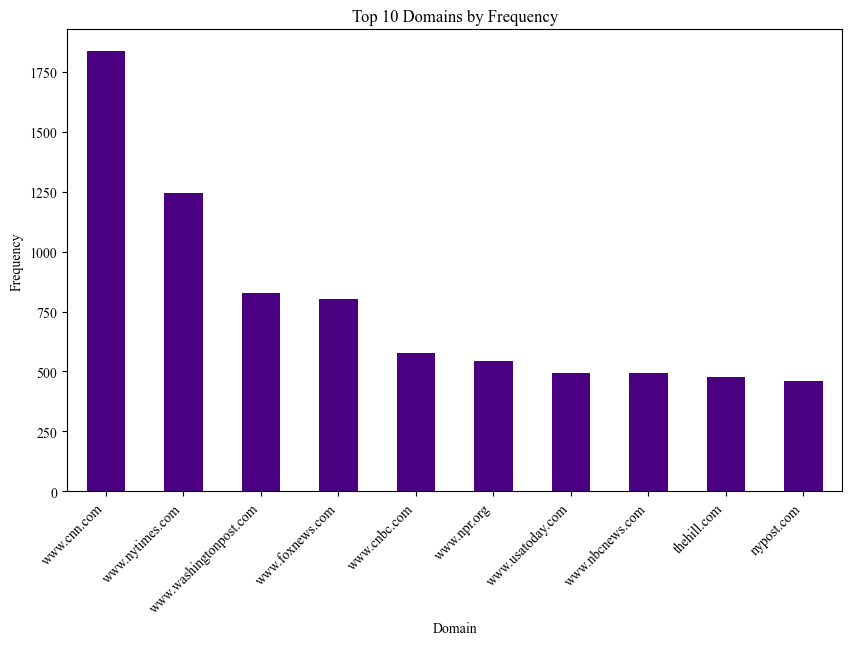

In [14]:
# get the top 10 domains by frequency
top_domains = df['domain'].value_counts().nlargest(10)

# make a bar chart of top domains
plt.figure(figsize=(10, 6))
plt.rcParams["font.family"] = "Times New Roman"
top_domains.plot(kind='bar', color='indigo')
plt.title('Top 10 Domains by Frequency')
plt.xlabel('Domain')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

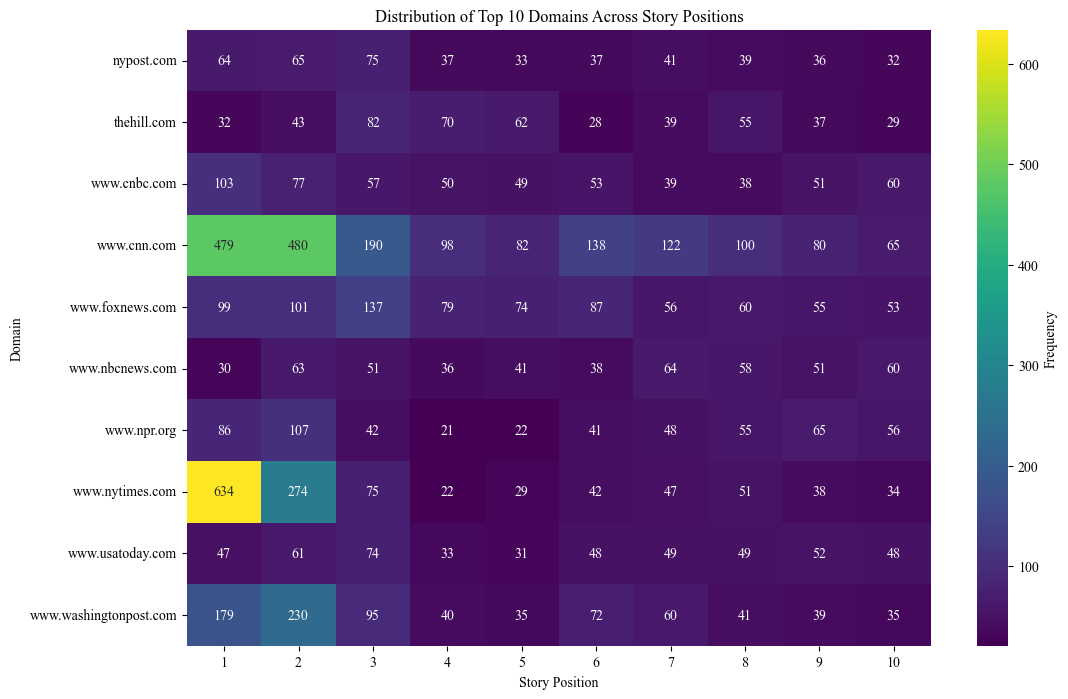

In [15]:
top_10_domains = top_domains.index

# filter DF to include only top 10 domains
df_top_10 = df[df['domain'].isin(top_10_domains)]

# pivot table for the top 10 domains
pivot_table_top_10 = df_top_10.pivot_table(index='domain', columns='story_position', aggfunc='size', fill_value=0)

# make a heatmap of domain vs. story position 
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top_10, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Frequency'})
plt.title('Distribution of Top 10 Domains Across Story Positions')
plt.xlabel('Story Position')
plt.ylabel('Domain')
plt.show()